In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from sklearn.model_selection import KFold


from common_functions import foo
mpl.style.use('classic')

%load_ext autoreload
%autoreload 2
results = "results"

In [2]:
from common_functions import latexify, format_axes, tableau20blind
latexify(14, 8)

In [3]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14,
    'legend.framealpha': .6,
    'axes.titlesize': 14,
    "axes.labelsize": 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 16,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [4]:
df = pd.read_csv("data.csv", index_col = 0)
df.head()

,latitude,longitude,ts,time_met,cluster_id,PM25_Concentration,station_id
0,40.090679,116.173553,0,2014-05-01,1.0,156.250000,1001.0
0,40.090679,116.173553,1,2014-05-02,1.0,24.833333,1001.0
0,40.090679,116.173553,2,2014-05-03,1.0,72.583333,1001.0
0,40.090679,116.173553,3,2014-05-04,1.0,30.043478,1001.0
0,40.090679,116.173553,4,2014-05-05,1.0,23.083333,1001.0


In [5]:
df.drop(columns=["ts", "cluster_id", "latitude", "longitude"], inplace=True)

In [6]:
new_df = df[df["station_id"] == 1001]

new_df.head()

,time_met,PM25_Concentration,station_id
0,2014-05-01,156.250000,1001.0
0,2014-05-02,24.833333,1001.0
0,2014-05-03,72.583333,1001.0
0,2014-05-04,30.043478,1001.0
0,2014-05-05,23.083333,1001.0


In [7]:
dates = new_df["time_met"].values
y = new_df["PM25_Concentration"]

In [8]:
import datetime as dt

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]


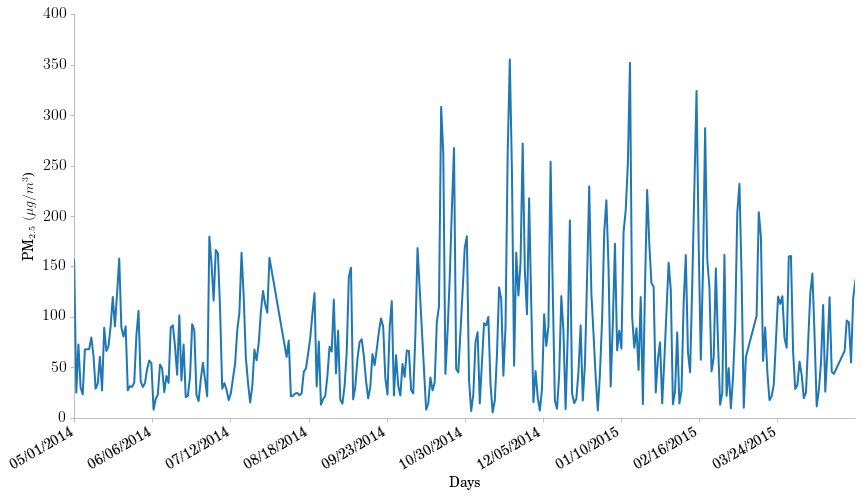

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)

# every_nth = 100
# for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
        
plt.gcf().autofmt_xdate()


plt.xticks(np.arange(min(x), max(x), (max(x) - min(x)) / 10))


plt.xlabel("Days")
plt.ylabel(r"PM$_{2.5} \ (\mu g /m^3$)")
format_axes(plt.gca())
plt.savefig("./plts/nonsmooth.pdf")